Pair Problem

We'll use statsmodels to fit some (Ordinary Least Squares) linear models using random data.

First make a response y of 200 random numbers. Then generate 20 random features in an X to predict with. Fit a linear model and check the summary() output. Do you have any features with P>|t| less than 0.05? (Repeat the process until you have at least one.)

Check out the model's R-squared and Adj. R-squared. Repeat the feature generation and model fitting process with 40, 60, 80, and 100 features. What happens with R-squared and Adj. R-squared?

If you have time, automate this experimental procedure and make a plot of R-squared and Adj. R-squared against number of features for one to one hundred features.

In [19]:
import numpy as np
import pandas as pd

In [41]:
# Generates 200 random numbers
y = np.random.randn(200,1)*100
X = np.random.rand(200,20)*100

In [42]:
x_prime_x = np.dot(X.T,X)
x_prime_x_inverse = np.linalg.inv(x_prime_x)
x_prime_x_inverse_x_prime = np.dot(x_prime_x_inverse, X.T)
x_prime_x_inverse_x_prime_y = np.dot(x_prime_x_inverse_x_prime,y)
beta = x_prime_x_inverse_x_prime_y
#beta = (np.linalg.inv((np.dot(X.T, X)) * X.T * y)
print x_prime_x_inverse_x_prime_y.shape

(20, 1)


In [43]:
import statsmodels.formula.api as sm

model = sm.OLS(y, X)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.8904
Date:                Thu, 14 Apr 2016   Prob (F-statistic):              0.600
Time:                        09:42:46   Log-Likelihood:                -1192.2
No. Observations:                 200   AIC:                             2424.
Df Residuals:                     180   BIC:                             2490.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.2608      0.265      0.983      0.3

In [44]:
results.rsquared

0.090024596104748111

In [45]:
results.rsquared_adj

-0.011083782105835382

In [59]:
X_dimension = np.arange(1,101)
R_values = []
R_adj_values = []


for dimension in X_dimension:
    #Step 1 - Generate your X and Y (range of X's dimensions go from 1 to 100). Store X dimension value.
    y = np.random.randn(200,1)*100
    X = np.random.rand(200,dimension)*100
    
    # Step 2 - Model it using stats model

    model = sm.OLS(y, X)
    results = model.fit()
    
    # Step 3 - Extract out R and R adjusted & Insert R and R adjusted into Final Series
    R_values.append(results.rsquared)
    R_adj_values.append(results.rsquared_adj)

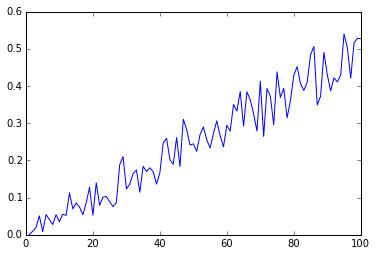

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X_dimension, R_values)

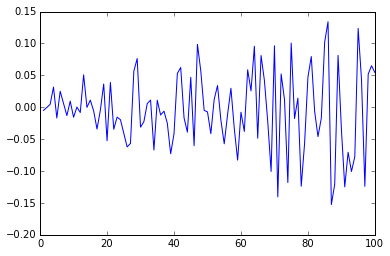

In [61]:
plt.plot(X_dimension,R_adj_values)